In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from collections import Counter

In [30]:
class Nernst():

    def find_potential(self,T,z,Xi,Xo):
        """
        T: Temperature in Kelvin
        z: Valence electrons of ion
        Xi: Inner membrane concentration (mM)
        Xo: Outer membrane concentration (mM)
        returns: Membrane potential for single species
        """
        membranePotential = (8.314*T)/(z*96485)*np.log(Xo/Xi)
        return membranePotential
    
    def plot_potential(self,volts,name):
        points = [0,1,2,3]
        values= [0,0,volts,volts]
        plt.scatter(points,values,label=name)
        plt.plot(points,values)
        plt.ylim(-100,100)
        plt.xlim(0,3)
        xlabs = np.arange(0, 4, 1.0)
        x_tick_names = ['','Channel Closed', 'Channel Open','']
        plt.xticks(xlabs,x_tick_names)
        plt.text(2, volts+5, str(round(volts, 2)))
        plt.title(f'Membrane Potential for {name}')
        plt.xlabel("Membrane Permeability")
        plt.ylabel("Voltage (mV)")
        plt.legend()
        
    def plot_positions(self,ion_object_list):
        names = []
        colors = []
        [names.append(x.get_name()) for x in ion_object_list]
        counted = dict(Counter(names))
        for key in counted:
            color = "#"+''.join([rd.choice('0123456789ABCDEF') for j in range(6)])
            for ion in range(counted[key]):
                colors.append(color)
        
        for i in range(len(ion_object_list)):
            position = ion_object_list[i].get_position()
            if ion_object_list[i].get_name() == ion_object_list[i-1].get_name():
                plt.scatter(position[0],position[1],color=colors[i])
            else:
                plt.scatter(position[0],position[1],color=colors[i],label=names[i])
        plt.plot([0,0],[0,1.1],c='black',linewidth=2,label='Membrane')
        
        xlabs = np.arange(-1.0,1.0,0.5)
        x_tick_names = ['','In','','Out']
        plt.xticks(xlabs,x_tick_names)
        
        plt.xlim(-1,1)
        plt.ylim(0,1.01)
        plt.title('Distrubution of Ions')
        plt.legend()
        plt.tick_params(left=False,bottom=True,labelleft=False,labelbottom=True)
    
Nernst = Nernst()

In [31]:
class ion(object):
    
    def __init__(self,ion_name,valence,IO):
        """ Initialize ion object.
        Inputs are
        ion_name: the type of ion (string)
        valence: number of valence electrons (int)
        location: string, either in or out
        """
        self.ion_name = ion_name
        self.valence = valence
        self.IO = IO
        if IO == 'in':
            self.position = (rd.uniform(-0.99,-0.1),rd.uniform(0.01,0.99))
        else:
            self.position = (rd.uniform(0.1,0.99),rd.uniform(0.01,0.99))
        
    def get_name(self):
        return(self.ion_name)
    
    def get_valence(self):
        return(self.valence)
    
    def get_IO(self):
        return(self.IO)
    
    def get_position(self):
        return(self.position)

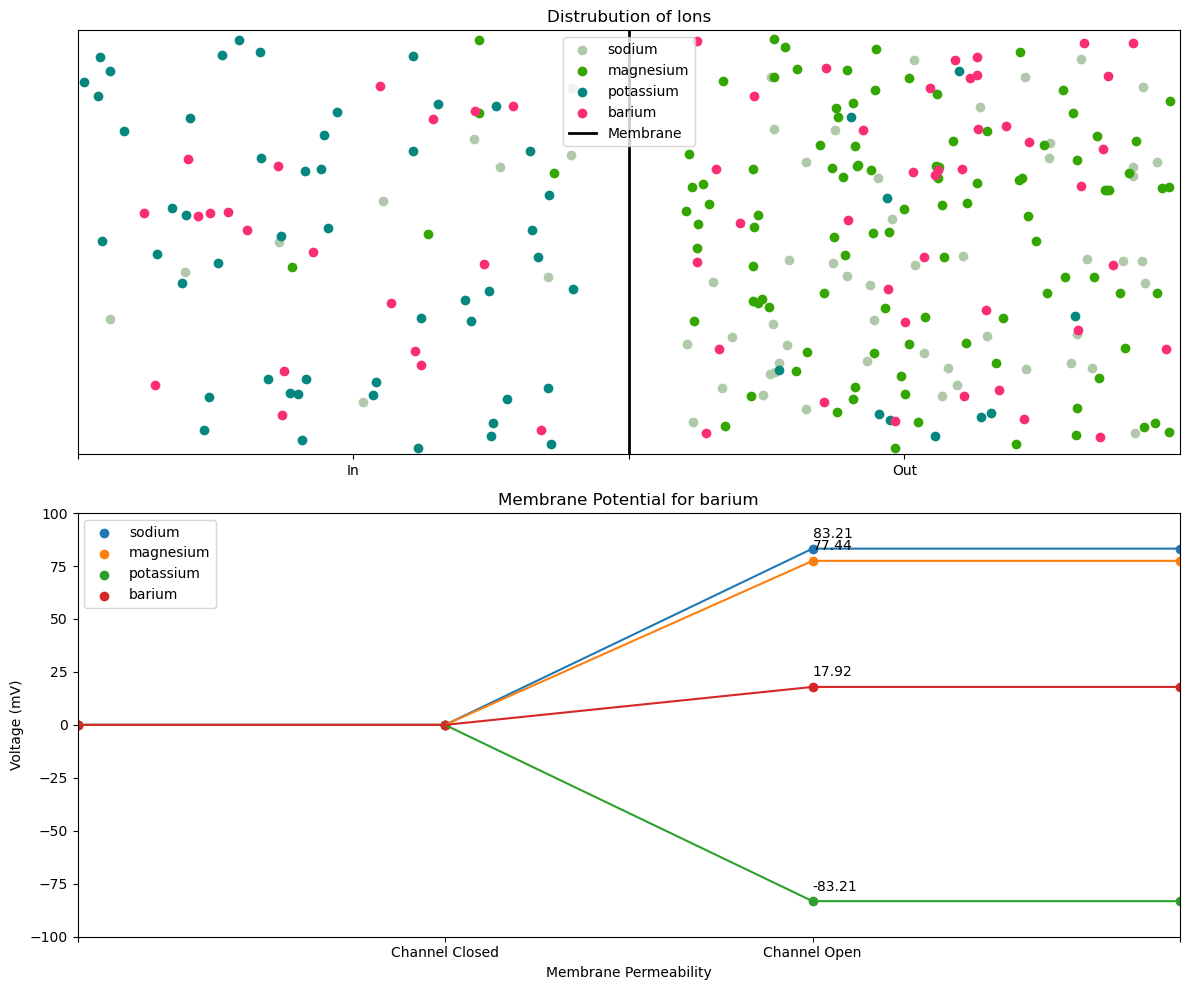

In [35]:
if __name__ == '__main__':
    
    ion_dict = {
#                  z  in  out
        'sodium': (1, 10, 50),
        'magnesium': (2, 5, 100),
        'potassium': (1, 50, 10),
        'barium': (2,20,40)
    }
    
    ion_object_list = []
    
    for key in ion_dict:
        for value in range(ion_dict[key][1]):
            new_ion = ion(key,ion_dict[key][0],'in')
            ion_object_list.append(new_ion)
        for value in range(ion_dict[key][2]):
            new_ion = ion(key,ion_dict[key][0],'out')
            ion_object_list.append(new_ion)
    
##################################################### Plot Ions
    plt.figure(figsize=(12,10))
    plt.subplot(2,1,1)
    Nernst.plot_positions(ion_object_list)
    
##################################################### Plot Potential
    plt.subplot(2,1,2)
    temp = 300
    
    for key in ion_dict:
        z = ion_dict[key][0]
        inside = ion_dict[key][1]/(ion_dict[key][2])
        outside = ion_dict[key][2]/(ion_dict[key][1])
        potential = Nernst.find_potential(temp,z,inside,outside)
        Nernst.plot_potential(potential*1000,key)

    plt.tight_layout()
    plt.show()